In [3]:
import numpy as np
import math 
import matplotlib.pyplot as plt 
import pickle

In [4]:
poolv = pickle.load(open("/home/lab1/repo/planning/saved_gibbs/8kfb_veh_pool.pickle",'rb'))

In [5]:
poolv

{2: array([[[  629.74658203, -2250.74169922],
         [  626.14746094, -2256.24243164],
         [  623.23803711, -2260.68237305],
         ...,
         [  589.33453369, -2320.19042969],
         [  587.24108887, -2324.35693359],
         [  585.06555176, -2328.69677734]],
 
        [[  582.79241943, -2333.0480957 ],
         [  580.39691162, -2337.41308594],
         [  577.96166992, -2341.65136719],
         ...,
         [  541.02270508, -2379.08691406],
         [  539.57574463, -2380.02075195],
         [  538.40289307, -2380.77563477]],
 
        [[  546.06811523, -2412.45117188],
         [  545.78515625, -2411.83129883],
         [  545.81494141, -2411.8605957 ],
         ...,
         [  541.03741455, -2401.99145508],
         [  541.01953125, -2401.93286133],
         [  541.12359619, -2402.11547852]],
 
        ...,
 
        [[  540.72607422, -2400.99902344],
         [  540.62365723, -2400.78149414],
         [  540.45123291, -2400.3190918 ],
         ...,
         [  53

In [7]:
def _get_av(prev2, prev, curr):
    v10 = np.linalg.norm(curr - prev)/0.5
    v9 = np.linalg.norm(prev - prev2)/0.5
    a = (v10-v9)/0.5
    return a, v10

def _get_theta(prev,curr):
    try:
        diff = curr[0]-prev[0] 
        if diff !=0:
            tan = (curr[1]-prev[1])/diff
            return math.atan(tan)
        else:
            return 90
    except:
        return 90

In [8]:
for key in poolv.keys():
    trajset = poolv[key]
    print(trajset.shape)

(1104, 20, 2)
(3098, 20, 2)
(3190, 20, 2)


In [10]:
delta_a, delta_theta=[],[]
for key in poolv.keys():
    trajset = poolv[key]
    for traj in trajset:
        prev_a=None
        prev_theta=None
        for i in range(2, len(traj)):
            prev2 = traj[i-2]
            prev = traj[i-1]
            curr = traj[i]
            a, v = _get_av(prev2, prev, curr)
            if prev_a is None:
                prev_a = a
            else:
                da = a-prev_a
                delta_a.append(da)
            theta = _get_theta(prev, curr)
            if prev_theta is None:
                prev_theta = theta
            else:
                dtheta = theta-prev_theta
                delta_theta.append(dtheta)
            

In [11]:
print(len(delta_a), len(delta_theta))

125664 125664


In [32]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.9999):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

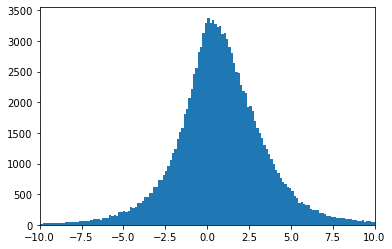

In [37]:
# xx = np.arange(-3,3,0.1)
plt.hist(delta_a, bins=1000)
plt.xlim(-10,10)
plt.show()

In [34]:
a,b,c = mean_confidence_interval(delta_a, 0.999999999)
print(a, b,c)

0.8123104408688374 0.7568494735514654 0.8677714081862095


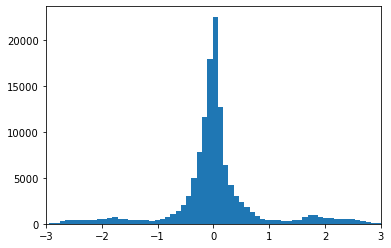

In [35]:
plt.hist(delta_theta, bins=1000)
plt.xlim(-3,3)
plt.show()

In [36]:
a,b,c = mean_confidence_interval(delta_theta, 0.999999999)
print(a, b,c)

0.02617519166954127 0.004310439107671607 0.04803994423141093


In [39]:
import itertools
action_dict = list(itertools.product(np.round(np.arange(-3,3,0.1), decimals=1), np.round(np.arange(-2,2,0.5), decimals=1)))
print(len(action_dict))

480
